# Getting The Dataset

In [ ]:
# !wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_LR_unknown_X2.zip

In [ ]:
from google.colab import drive 
from google.colab import files
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!cp /content/gdrive/MyDrive/Models/Data/DIV2K_train_HR.zip /content/DIV2K_train_HR.zip

In [ ]:
!cp /content/gdrive/MyDrive/Models/Data/DIV2K_train_LR_unknown_X2.zip /content/DIV2K_train_LR_unknown_X2.zip

In [ ]:
!unzip /content/DIV2K_train_HR.zip

Archive:  /content/DIV2K_train_HR.zip
   creating: DIV2K_train_HR/
  inflating: DIV2K_train_HR/0103.png  
  inflating: DIV2K_train_HR/0413.png  
  inflating: DIV2K_train_HR/0031.png  
  inflating: DIV2K_train_HR/0660.png  
  inflating: DIV2K_train_HR/0126.png  
  inflating: DIV2K_train_HR/0793.png  
  inflating: DIV2K_train_HR/0764.png  
  inflating: DIV2K_train_HR/0550.png  
  inflating: DIV2K_train_HR/0437.png  
  inflating: DIV2K_train_HR/0374.png  
  inflating: DIV2K_train_HR/0755.png  
  inflating: DIV2K_train_HR/0614.png  
  inflating: DIV2K_train_HR/0646.png  
  inflating: DIV2K_train_HR/0371.png  
  inflating: DIV2K_train_HR/0312.png  
  inflating: DIV2K_train_HR/0108.png  
  inflating: DIV2K_train_HR/0556.png  
  inflating: DIV2K_train_HR/0794.png  
  inflating: DIV2K_train_HR/0722.png  
  inflating: DIV2K_train_HR/0780.png  
  inflating: DIV2K_train_HR/0555.png  
  inflating: DIV2K_train_HR/0439.png  
  inflating: DIV2K_train_HR/0396.png  
  inflating: DIV2K_train_HR/0666.png

In [ ]:
# !wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip

In [ ]:
!unzip /content/DIV2K_train_LR_unknown_X2.zip

Archive:  /content/DIV2K_train_LR_unknown_X2.zip
   creating: DIV2K_train_LR_unknown/X2/
  inflating: DIV2K_train_LR_unknown/X2/0261x2.png  
  inflating: DIV2K_train_LR_unknown/X2/0229x2.png  
  inflating: DIV2K_train_LR_unknown/X2/0188x2.png  
  inflating: DIV2K_train_LR_unknown/X2/0711x2.png  
  inflating: DIV2K_train_LR_unknown/X2/0187x2.png  
  inflating: DIV2K_train_LR_unknown/X2/0198x2.png  
  inflating: DIV2K_train_LR_unknown/X2/0770x2.png  
  inflating: DIV2K_train_LR_unknown/X2/0694x2.png  
  inflating: DIV2K_train_LR_unknown/X2/0001x2.png  
  inflating: DIV2K_train_LR_unknown/X2/0414x2.png  
  inflating: DIV2K_train_LR_unknown/X2/0123x2.png  
  inflating: DIV2K_train_LR_unknown/X2/0067x2.png  
  inflating: DIV2K_train_LR_unknown/X2/0538x2.png  
  inflating: DIV2K_train_LR_unknown/X2/0178x2.png  
  inflating: DIV2K_train_LR_unknown/X2/0587x2.png  
  inflating: DIV2K_train_LR_unknown/X2/0357x2.png  
  inflating: DIV2K_train_LR_unknown/X2/0598x2.png  
  inflating: DIV2K_train_LR

In [ ]:
# dataset_path = "/content/gdrive/MyDrive/Models/Data/"

In [ ]:
# files.download("/content/DIV2K_train_LR_unknown")

In [ ]:
# !cp /content/DIV2K_train_HR.zip "/content/gdrive/MyDrive/Models/Data"

In [ ]:
# !cp /content/DIV2K_train_LR_unknown_X2.zip "/content/gdrive/MyDrive/Models/Data"

In [ ]:
!rm /content/DIV2K_train_HR.zip

In [ ]:
!rm /content/DIV2K_train_LR_unknown_X2.zip

In [ ]:
!ls /content/DIV2K_train_HR | wc -l 

800


# Exploring the dataset

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [ ]:
i_hr = cv2.imread('/content/DIV2K_train_HR/0001.png')
i_hr = cv2.cvtColor(i_hr, cv2.COLOR_BGR2RGB)

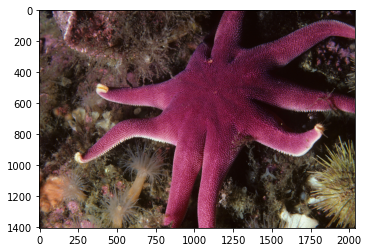

In [ ]:
plt.imshow(i_hr)

In [ ]:
i_hr.shape

(1404, 2040, 3)

In [ ]:
i_lr = cv2.imread('/content/DIV2K_train_LR_unknown/X2/0001x2.png')
i_lr = cv2.cvtColor(i_lr, cv2.COLOR_BGR2RGB)

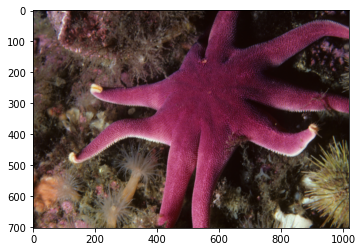

In [ ]:
plt.imshow(i_lr)

In [ ]:
i_lr.shape

(702, 1020, 3)

In [ ]:
i_hr_path = '/content/DIV2K_train_HR/'
i_lr_path = '/content/DIV2K_train_LR_unknown/X2/'

list_images_hr = os.listdir(i_hr_path)
list_images_lr = os.listdir(i_lr_path)

#Pre Processing On data

In [ ]:
import os

In [ ]:
hr_patches = []
lr_patches = []
PATCH_SIZE = 100
SCALING_FACTOR = 2
STRIDE = 200

In [ ]:
from typing import List, Tuple

PatchPairs = List[Tuple[np.ndarray]]
def generate_patches(i_lr: np.ndarray, i_hr: np.ndarray, stride: int, patch_size: int, random_cropping: bool = False, random_patch_count = 1) -> PatchPairs:
  lr_height, lr_width = i_lr.shape[0], i_lr.shape[1]
  patches = []
  scaling_factor = int(i_hr.shape[0]/i_lr.shape[0])
  if random_cropping:
    for i in range(random_patch_count):
      j = np.random.random_integers(0, lr_height - patch_size + 1)
      k = np.random.random_integers(0, lr_width - patch_size + 1)
      i_lr_patch = i_lr[j:j+patch_size, k:k+patch_size]
      i_hr_patch = i_hr[(j*scaling_factor):(j*scaling_factor)+(patch_size*scaling_factor), (k*scaling_factor):(k*scaling_factor)+(patch_size*scaling_factor)]
      patches.append((i_lr_patch,i_hr_patch))    
  else:
    for j in range(0, lr_height - patch_size + 1, stride):
      for k in range(0, lr_width - patch_size + 1, stride):
        i_lr_patch = i_lr[j:j+patch_size, k:k+patch_size]
        i_hr_patch = i_hr[(j*scaling_factor):(j*scaling_factor)+(patch_size*scaling_factor), (k*scaling_factor):(k*scaling_factor)+(patch_size*scaling_factor)]
        patches.append((i_lr_patch,i_hr_patch))
  return patches

In [ ]:
hr_image_path = '/content/DIV2K_train_HR/'
lr_image_path = '/content/DIV2K_train_LR_unknown/X2/'

In [ ]:
list_images_hr = os.listdir(hr_image_path)
list_images_lr = os.listdir(lr_image_path)
print(list_images_hr)
print(list_images_lr)

['0223.png', '0693.png', '0461.png', '0497.png', '0098.png', '0551.png', '0439.png', '0260.png', '0401.png', '0311.png', '0206.png', '0162.png', '0138.png', '0733.png', '0779.png', '0636.png', '0423.png', '0233.png', '0764.png', '0458.png', '0427.png', '0344.png', '0350.png', '0769.png', '0104.png', '0508.png', '0772.png', '0584.png', '0322.png', '0193.png', '0697.png', '0131.png', '0465.png', '0736.png', '0398.png', '0570.png', '0336.png', '0114.png', '0440.png', '0794.png', '0413.png', '0407.png', '0286.png', '0490.png', '0102.png', '0198.png', '0207.png', '0626.png', '0723.png', '0558.png', '0108.png', '0146.png', '0443.png', '0318.png', '0506.png', '0597.png', '0635.png', '0103.png', '0726.png', '0454.png', '0109.png', '0742.png', '0414.png', '0142.png', '0674.png', '0701.png', '0082.png', '0319.png', '0778.png', '0369.png', '0535.png', '0428.png', '0173.png', '0444.png', '0089.png', '0410.png', '0460.png', '0308.png', '0248.png', '0005.png', '0213.png', '0495.png', '0513.png', '02

In [ ]:
lr_patches = []
hr_patches = []

In [ ]:
# patches = generate_patches(i_lr, i_hr, STRIDE, PATCH_SIZE, random_cropping=True)
i = 0
for i in range(25):

  hr_image = cv2.imread(hr_image_path + list_images_hr[i])
  # hr_image = hr_image / 255

  lr_image = cv2.imread(lr_image_path + list_images_hr[i].split(".")[0] + "x2.png")
  # lr_image = lr_image / 255
  # print(lr_image_path + list_images_hr[i].split(".")[0] + "x2.png")
  
  lr_image = cv2.cvtColor(lr_image, cv2.COLOR_BGR2RGB)
  hr_image = cv2.cvtColor(hr_image, cv2.COLOR_BGR2RGB)
  patches = generate_patches(i_lr, i_hr, STRIDE, PATCH_SIZE)
  for patch_pair in patches:
    lr_patches.append(patch_pair[0])
    hr_patches.append(patch_pair[1])
    

In [ ]:
lr_patches = np.asarray(lr_patches)
hr_patches = np.asarray(hr_patches)

In [ ]:
print(lr_patches.shape)
print(hr_patches.shape)

(500, 100, 100, 3)
(500, 200, 200, 3)


In [ ]:
# lr_image = lr_image / 255
# height, width = lr_image.shape[0], lr_image.shape[1]

# for j in range(0, height - lr_patch_size + 1, lr_stride):
#     for k in range(0, width - lr_patch_size + 1, lr_stride):
#       if (lr_patch_size + j > lr_image.shape[0]) or (lr_patch_size + k > lr_image.shape[1]):
#         continue
      
#       patch = lr_image[j:j+lr_patch_size, k:k+lr_patch_size]
#       lr_patches.append(patch)


In [ ]:
# lr_patches = np.asarray(lr_patches)
# lr_patches = np.reshape(lr_patches, (lr_patches.shape[0], lr_patches.shape[1], lr_patches.shape[2], 3))

In [ ]:
# lr_patches.shape

In [ ]:
# height, width = hr_image.shape[0], hr_image.shape[1]
# # patch_size = 200

# for j in range(0, height - hr_patch_size + 1, hr_stride):
#     for k in range(0, width - hr_patch_size + 1, hr_stride):
#       if (hr_patch_size + j > hr_image.shape[0]) or (hr_patch_size + k > hr_image.shape[1]):
#         continue
      
#       patch = hr_image[j:j+hr_patch_size, k:k+hr_patch_size]
#       hr_patches.append(patch)


In [ ]:
# hr_patches = np.asarray(hr_patches)
# hr_patches = np.reshape(hr_patches, (hr_patches.shape[0], hr_patches.shape[1], hr_patches.shape[2], 3))

In [ ]:
# hr_patches.shape

In [ ]:
# lr_patches.shape

In [ ]:
# lr_patches[1].shape

In [ ]:
# plt.imshow(lr_patches[1])

In [ ]:
# plt.imshow(hr_patches[1])

In [ ]:
# hr_patches[1].shape

In [ ]:
# patches = []
# noisy_patches = []
# patch_size = 100
# stride = 100
# scaling_factor = 2

# for i in range(25):
#   i_hr = cv2.imread(i_hr_path + list_images_hr[i])
#   i_hr = cv2.cvtColor(i_hr, cv2.COLOR_BGR2RGB)
#   i_hr = i_hr / 255
#   height, width = i_hr.shape[0], i_hr.shape[1]

#   i_lr = cv2.imread(i_lr_path + list_images_hr[i].split(".")[0] + "x2.png")
#   i_lr = cv2.cvtColor(i_lr, cv2.COLOR_BGR2RGB)
#   i_lr = i_lr / 255
#   i_lr = cv2.resize(i_lr, dsize = (width, height), interpolation=cv2.INTER_CUBIC)
#   # print(i_lr.shape == i_hr.shape)

#   for j in range(0, height - patch_size + 1, stride):
#     for k in range(0, width - patch_size + 1, stride):
#       if (patch_size + j > i_lr.shape[0]) or (patch_size + k > i_lr.shape[1]):
#         continue
      
#       patch = i_lr[j:j+patch_size, k:k+patch_size]
#       noisy_patches.append(patch)

#       patch = i_hr[j:patch_size + j, k:patch_size + k]
#       patches.append(patch)    



In [ ]:
# type(i_hr)
# print(i_hr.shape)

In [ ]:
# temp = i_lr
# temp[temp < 0] = 0
# temp[temp > 1] = 1

In [ ]:
# plt.imsave("temp_image.png", temp)

In [ ]:
# plt.imshow(i_hr)

In [ ]:
# from PIL import Image
# plt.imsave("i_hr.png", i_hr)
# plt.imsave("i_lr.png", i_lr)

In [ ]:
# plt.savefig('i_hr.png')

In [ ]:
# plt.imshow(i_lr)

In [ ]:
# patches = np.asarray(patches)
# patches = np.reshape(patches, (patches.shape[0], patches.shape[1], patches.shape[2], 3))

# noisy_patches = np.asarray(noisy_patches)
# noisy_patches = np.reshape(noisy_patches, (noisy_patches.shape[0], noisy_patches.shape[1], noisy_patches.shape[2], 3))

In [ ]:
# print(patches.shape)
# print(noisy_patches.shape)

In [ ]:
# random_seed = 34
# plt.imshow(np.reshape(patches[random_seed], (patches[random_seed].shape[0], patches[random_seed].shape[1], 3)))

In [ ]:
# plt.imshow(np.reshape(noisy_patches[random_seed], (noisy_patches[random_seed].shape[0], noisy_patches[random_seed].shape[1], 3)))

# Defining the model

In [ ]:
import tensorflow.keras as keras
from keras.utils.vis_utils import plot_model
from keras.layers import  BatchNormalization
import math
import tensorflow as tf

In [ ]:
# input = keras.layers.Input((100, 100, 3))
# # comparator = keras.models.Sequential()

# x1 = keras.layers.Conv2D(kernel_size=(3,3), filters = 512, input_shape=(100, 100, 3), activation='relu', padding = "same")(input)
# x = keras.layers.Concatenate()([input,x1])
# x2 = keras.layers.Conv2D(kernel_size=(3,3), filters = 256, activation='relu', padding = "same")(x)
# x = keras.layers.Concatenate()([input, x1, x2])
# x3 = keras.layers.Conv2D(kernel_size=(3,3), filters = 128, activation='relu', padding = "same")(x)
# x = keras.layers.Concatenate()([input, x1, x2, x3])
# x4 = keras.layers.Conv2D(kernel_size=(3,3), filters = 64, activation='relu', padding = "same")(x)
# x = keras.layers.Concatenate()([input, x1, x2, x3, x4])
# x5 = keras.layers.Conv2D(kernel_size=(3,3), filters = 32, activation='relu', padding = "same")(x)
# x = keras.layers.Concatenate()([input, x1, x2, x3, x4, x5])
# x6 = keras.layers.Conv2D(kernel_size=(3,3), filters = 16, activation='relu', padding = "same")(x)
# x = keras.layers.Concatenate()([input, x1, x2, x3, x4, x5, x6])
# x7 = keras.layers.Conv2DTranspose(filters = 3, kernel_size = (3,3), padding = "same", strides = (2,2), activation = "relu")(x)

# x5 = keras.layers.Conv2D(kernel_size=(3,3), filters = 64, activation='relu', padding = "same")(x4)
# x6 = keras.layers.Conv2D(kernel_size=(3,3), filters = 32, activation='relu', padding = "same")(x5)
# x7 = keras.layers.Conv2D(kernel_size=(3,3), filters = 32, activation='relu', padding = "same")(x6)
# x8 = keras.layers.Conv2D(kernel_size=(3,3), filters = 3, activation='relu', padding = "same")(x7)

# x3.add(keras.layers.Conv2D(kernel_size=(3,3), filters = 64, activation='relu', padding = "same"))
# print(x1.shape, x2.shape)
# x = keras.layers.Concatenate()([input, x1, x2, x3])
# transposeNet = keras.models.Model(inputs=input, outputs=x3)

# transposeNet.add(keras.layers.Conv2D(kernel_size=(3,3), filters = 64, activation='relu', padding = "same"))
# x4 = keras.layers.Conv2D(kernel_size=(3,3), filters = 64, activation='relu', padding = "same")
# x = keras.layers.Concatenate()([input, x1, x2, x3, x4])
# x5 = keras.layers.Conv2D(kernel_size=(3,3), filters = 16, activation='relu', padding = "same")
# x = keras.layers.Concatenate()([input, x1, x2, x3, x4, x5])
# x = keras.layers.Conv2D(kernel_size=(3,3), filters = 3, activation='relu', padding = "same")

In [ ]:
# def get_model(upscale_factor=3, channels=1):
#     conv_args = {
#         "activation": "relu",
#         "kernel_initializer": "Orthogonal",
#         "padding": "same",
#     }
inputs = keras.Input(shape=(None, None, 3))
x = keras.layers.Conv2D(64, 5, activation='relu', padding = 'same')(inputs)
x = keras.layers.Conv2D(64, 3, activation='relu', padding = 'same')(x)
x = keras.layers.Conv2D(32, 3, activation='relu', padding = 'same')(x)
x = keras.layers.Conv2D(3 * (2 ** 2), 3, activation='relu', padding = 'same')(x)
outputs = tf.nn.depth_to_space(x, 2)

    # return keras.Model(inputs, outputs)

In [ ]:
transposeNet = keras.models.Model(inputs=inputs, outputs=outputs)

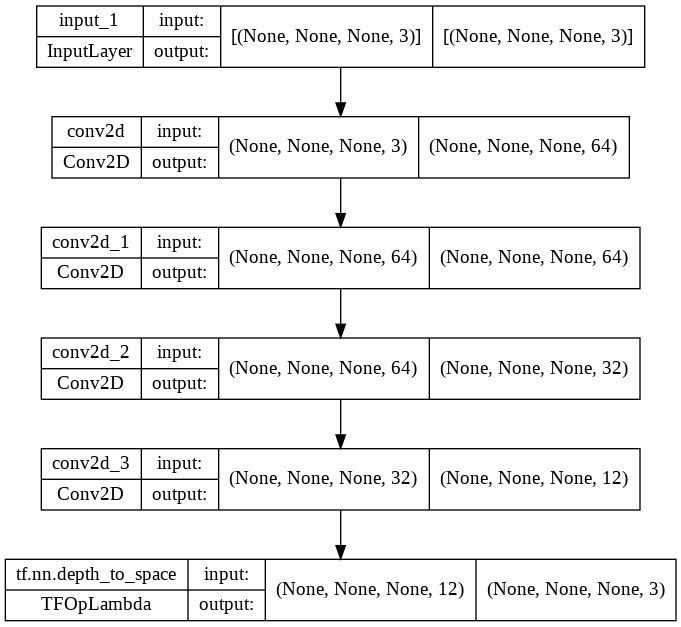

In [ ]:
plot_model(transposeNet, show_shapes=True)

In [ ]:
transposeNet.compile(loss=["mse"], optimizer=keras.optimizers.Adam(learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam"))

# Training the model

In [ ]:
from keras.callbacks import LearningRateScheduler

In [ ]:
# def step_decay(epoch, lr):
#   initial_lr = 1e-3
#   if epoch<150:
#     lr = initial_lr
#   else:
#     lr = lr/10
    
#   return lr

def step_decay(epoch, lr):
	initial_lrate = 0.001
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

In [ ]:
checkpoint_path = "/content/gdrive/MyDrive/Models/SUBPIXEL_CONVO/"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
lrs = LearningRateScheduler(step_decay)

In [ ]:
transposeNet.load_weights(checkpoint_path)

NameError: ignored

In [ ]:
# print(noisy_patches.shape, patches.shape)

In [ ]:
# comparator.fit(lr_patches, hr_patches, batch_size = 128, epochs = 50, callbacks = [lrs, cp_callback], verbose = 1)
transposeNet.fit(lr_patches, hr_patches, batch_size = 25, epochs = 50, verbose = 2)

Epoch 1/50
20/20 - 12s - loss: 2058.2952 - 12s/epoch - 611ms/step
Epoch 2/50
20/20 - 1s - loss: 434.6064 - 715ms/epoch - 36ms/step
Epoch 3/50
20/20 - 1s - loss: 261.0347 - 715ms/epoch - 36ms/step
Epoch 4/50
20/20 - 1s - loss: 190.4616 - 716ms/epoch - 36ms/step
Epoch 5/50
20/20 - 1s - loss: 152.9624 - 715ms/epoch - 36ms/step
Epoch 6/50
20/20 - 1s - loss: 127.3296 - 715ms/epoch - 36ms/step
Epoch 7/50
20/20 - 1s - loss: 108.6280 - 717ms/epoch - 36ms/step
Epoch 8/50
20/20 - 1s - loss: 94.6047 - 717ms/epoch - 36ms/step
Epoch 9/50
20/20 - 1s - loss: 94.5914 - 711ms/epoch - 36ms/step
Epoch 10/50
20/20 - 1s - loss: 91.8192 - 720ms/epoch - 36ms/step
Epoch 11/50
20/20 - 1s - loss: 79.5939 - 717ms/epoch - 36ms/step
Epoch 12/50
20/20 - 1s - loss: 73.4400 - 717ms/epoch - 36ms/step
Epoch 13/50
20/20 - 1s - loss: 69.8242 - 716ms/epoch - 36ms/step
Epoch 14/50
20/20 - 1s - loss: 67.2077 - 719ms/epoch - 36ms/step
Epoch 15/50
20/20 - 1s - loss: 64.9783 - 717ms/epoch - 36ms/step
Epoch 16/50
20/20 - 1s - l

In [ ]:
lr_image = cv2.imread('/content/DIV2K_train_LR_unknown/X2/0001x2.png')

# og_image = cv2.imread('/content/DIV2K_train_HR/0001.png')
# print(lr_image.shape, og_image.shape)
# lr_image = cv2.resize(lr_image, dsize = (og_image.shape[1], og_image.shape[0]), interpolation=cv2.INTER_CUBIC)

In [ ]:
lr_image.shape

(702, 1020, 3)

In [ ]:
lr_image = cv2.cvtColor(lr_image, cv2.COLOR_BGR2RGB)
# lr_image = lr_image / 255

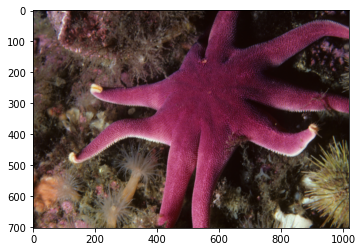

In [ ]:
plt.imshow(lr_image)

In [ ]:
lr_image = np.reshape(lr_image, (1, lr_image.shape[0], lr_image.shape[1], 3))

In [ ]:
lr_image.shape

(1, 702, 1020, 3)

In [ ]:
hr_patch = np.reshape(patches[0][1], (1, 200, 200, 3))
lr_patch = np.reshape(patches[0][0], (1, 100, 100, 3))
lr_patch = lr_patch / 255

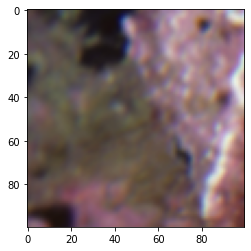

In [ ]:
plt.imshow(lr_patch.reshape(100, 100, 3))

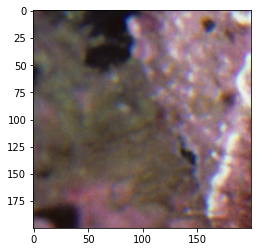

In [ ]:
plt.imshow(hr_patch.reshape(200, 200, 3))

In [ ]:
lr_image_converted = transposeNet.predict(lr_patch)

In [ ]:
lr_image_converted.shape

(1, 200, 200, 3)

In [ ]:
lr_image_converted = lr_image_converted.reshape(200,200,3)

In [ ]:
lr_image

array([[[[80, 65, 65],
         [81, 66, 62],
         [78, 62, 58],
         ...,
         [17,  4,  1],
         [15,  5,  0],
         [14,  5,  0]],

        [[82, 66, 65],
         [83, 67, 64],
         [80, 63, 59],
         ...,
         [17,  4,  1],
         [16,  5,  1],
         [14,  5,  0]],

        [[87, 70, 67],
         [87, 68, 67],
         [83, 65, 64],
         ...,
         [17,  5,  1],
         [16,  5,  1],
         [15,  5,  0]],

        ...,

        [[25, 15,  5],
         [24, 14,  4],
         [25, 14,  7],
         ...,
         [48, 37, 13],
         [30, 21,  3],
         [24, 15,  3]],

        [[24, 16,  7],
         [25, 15,  6],
         [27, 17, 11],
         ...,
         [31, 23,  4],
         [25, 17,  1],
         [23, 14,  1]],

        [[25, 19,  9],
         [27, 19, 10],
         [31, 22, 15],
         ...,
         [25, 17,  1],
         [24, 16,  1],
         [23, 14,  1]]]], dtype=uint8)

In [ ]:
# lr_image = lr_image / 255

In [ ]:
lr_image_converted = cv2.cvtColor(lr_image_converted, cv2.COLOR_BGR2RGB)

In [ ]:
lr_image_converted.shape

(200, 200, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


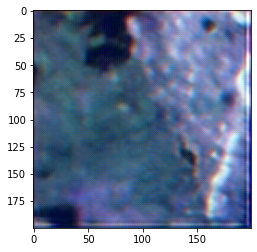

In [ ]:
plt.imshow(lr_image_converted.reshape(200,200,3))

In [ ]:
plt.imsave('lr_image_converted.png', lr_image_converted.reshape(200,200,3))

ValueError: ignored

In [ ]:
lr_image_converted

array([[[[0.34431627, 0.18227519, 0.21454   ],
         [0.36419088, 0.25606316, 0.30065957],
         [0.32738575, 0.24770232, 0.29787165],
         ...,
         [0.85853004, 0.6418427 , 0.75389564],
         [0.7771324 , 0.5950079 , 0.66473776],
         [0.7081187 , 0.5203927 , 0.56102693]],

        [[0.35252345, 0.2998315 , 0.2751574 ],
         [0.41723186, 0.27231005, 0.36390758],
         [0.43253028, 0.35479933, 0.3681498 ],
         ...,
         [0.902375  , 0.7468598 , 0.85108554],
         [0.82337797, 0.66197586, 0.71956766],
         [0.66786885, 0.5707875 , 0.58595765]],

        [[0.42831615, 0.28605774, 0.2783808 ],
         [0.45099515, 0.3147005 , 0.28127357],
         [0.37136903, 0.3055041 , 0.2836847 ],
         ...,
         [0.9479292 , 0.80335456, 0.9742001 ],
         [0.7275509 , 0.7573892 , 0.69719774],
         [0.7073398 , 0.6067586 , 0.6343277 ]],

        ...,

        [[0.51194656, 0.3868729 , 0.39143583],
         [0.5749978 , 0.4153942 , 0.47660083]

In [ ]:
lr_image

array([[[0.94509804, 0.99215686, 0.99215686],
        [0.94509804, 0.99215686, 0.99215686],
        [0.94509804, 0.99215686, 0.99215686],
        ...,
        [0.47058824, 0.63137255, 0.80392157],
        [0.4627451 , 0.63137255, 0.80392157],
        [0.45882353, 0.63137255, 0.8       ]],

       [[0.94901961, 0.99607843, 0.99215686],
        [0.94901961, 0.99607843, 0.99215686],
        [0.94901961, 0.99215686, 0.99215686],
        ...,
        [0.47058824, 0.63529412, 0.80392157],
        [0.46666667, 0.63137255, 0.80392157],
        [0.45882353, 0.63137255, 0.8       ]],

       [[0.94901961, 0.99607843, 0.99607843],
        [0.94901961, 0.99607843, 0.99607843],
        [0.94901961, 0.99607843, 0.99607843],
        ...,
        [0.46666667, 0.63921569, 0.80784314],
        [0.46666667, 0.63921569, 0.80392157],
        [0.4627451 , 0.63921569, 0.8       ]],

       ...,

       [[0.43921569, 0.36862745, 0.31764706],
        [0.45098039, 0.37647059, 0.31372549],
        [0.43137255, 0

In [ ]:
lr_image_converted.shape

(1, 200, 200, 3)

In [ ]:
print(lr_image_converted)

[[[[0.01545879 0.06207879 0.7805273 ]
   [0.47627628 0.541662   0.58679736]
   [0.770474   0.7134025  0.6883576 ]
   ...
   [0.70680106 0.6663086  0.38165462]
   [0.8542627  0.63572496 0.04204461]
   [0.6414361  0.38175306 0.        ]]

  [[0.24456777 0.41470617 1.0677949 ]
   [0.9496886  0.6836248  1.0372638 ]
   [1.2573838  0.96403956 1.0035007 ]
   ...
   [1.4506161  0.7927159  0.7400263 ]
   [1.1221309  0.657289   0.40745273]
   [0.9791843  0.45938122 0.        ]]

  [[0.50693226 0.4674143  1.1975529 ]
   [1.1091433  0.73081774 1.1226287 ]
   [1.605591   1.0490863  1.1548498 ]
   ...
   [1.4268177  1.0178381  0.9692778 ]
   [1.5049146  0.747526   0.37757078]
   [0.9576608  0.44072857 0.        ]]

  ...

  [[0.48911613 0.66706693 0.9842493 ]
   [1.310397   0.7919993  0.99748784]
   [1.4015689  0.8932282  1.1021214 ]
   ...
   [1.7926993  1.0031471  0.9003909 ]
   [1.6150017  0.7556265  0.46270186]
   [1.1300381  0.30083612 0.        ]]

  [[0.6888529  0.43515158 0.74482924]
   [0.8

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


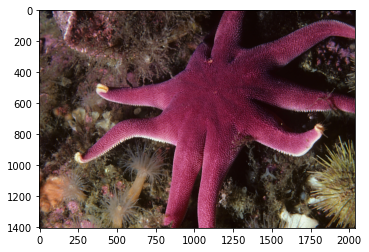

In [ ]:
plt.imshow(np.reshape(lr_image, (lr_image.shape[1], lr_image.shape[2], lr_image.shape[3])))

In [ ]:
lr_image = cv2.imread('/content/DIV2K_train_LR_unknown/X2/0001x2.png')
hr_image = cv2.imread('/content/DIV2K_train_HR/0001.png')
lr_image = cv2.cvtColor(lr_image, cv2.COLOR_BGR2RGB)
hr_image = cv2.cvtColor(hr_image, cv2.COLOR_BGR2RGB)

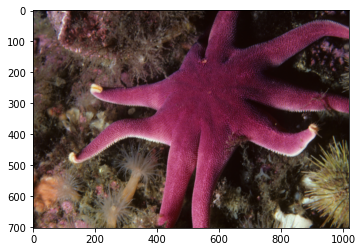

In [ ]:
plt.imshow(lr_image)

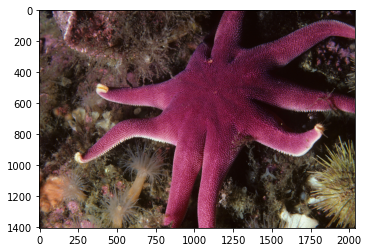

In [ ]:
plt.imshow(hr_image)

In [ ]:
lr_image.shape

(702, 1020, 3)

In [ ]:
lr_image = lr_image / 255
lr_image = np.reshape(lr_image, (1, 702, 1020, 3))
lr_predicted = transposeNet.predict(lr_image)

In [ ]:
lr_predicted.shape

(1, 1404, 2040, 3)

In [ ]:
lr_predicted = np.reshape(lr_predicted, (1404, 2040, 3))

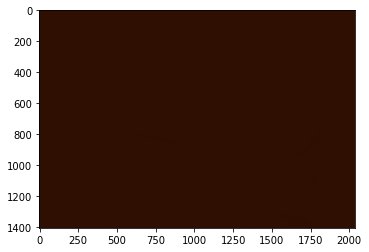

In [ ]:
plt.imshow(lr_predicted)